# Step 1 — Initial loading and exploration


(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

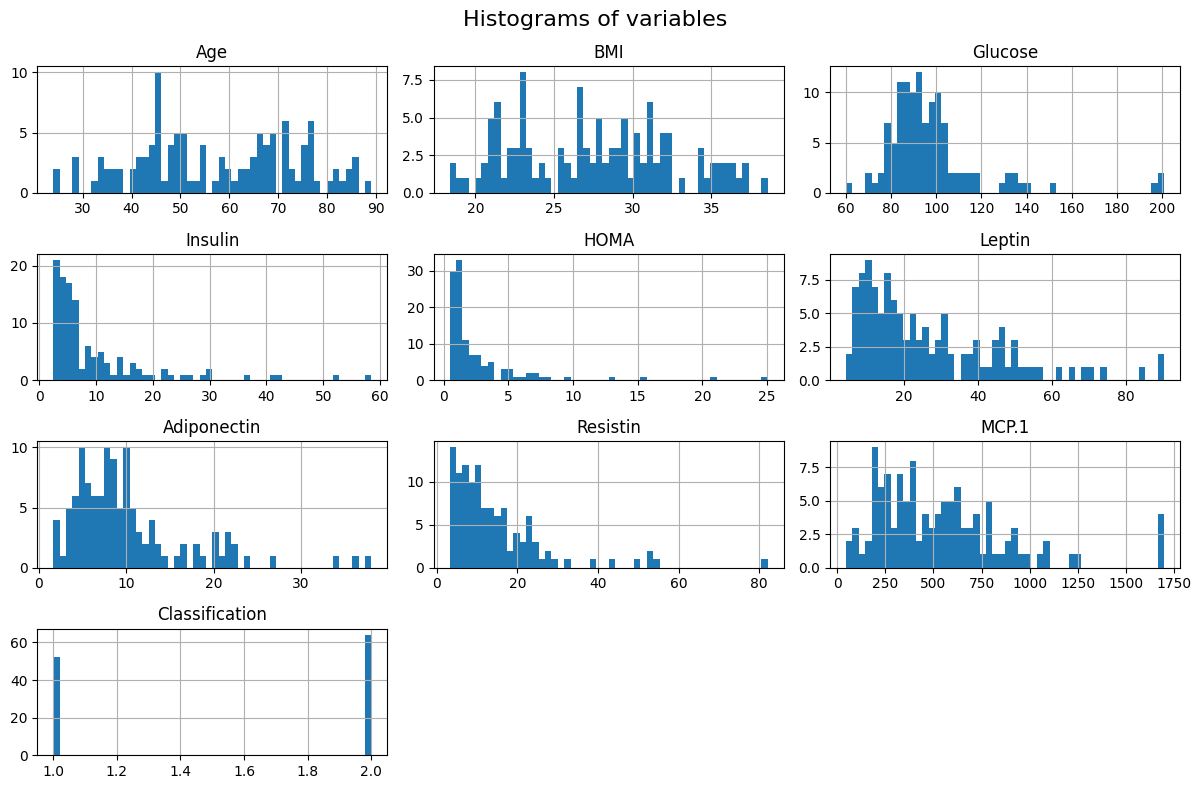

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('breast+cancer+coimbra/dataR2.csv')

# Data overview
print(data.shape)
print(data.head())
data.info()

# List of explanatory variables
features = data.columns[:-1]
print("The explanatory variables are:", list(features))
target = 'Classification'

# Histograms of variables
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histograms of variables", fontsize=16)
plt.tight_layout()
plt.show()


We use data from the *Breast Cancer Coimbra* dataset, which contains biometric measurements of 116 patients. The goal is to predict whether a patient has breast cancer or not, based on nine biological variables.

### Dataset overview

The dataset contains 116 observations and 10 variables, including:
- **9 continuous explanatory variables**: `Age`, `BMI`, `Glucose`, `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, `MCP.1`.
- **1 target variable**: `Classification`, which takes the value `1` if the patient has cancer (positive) and `2` otherwise (negative).

There are no missing values in the data, allowing us to proceed directly with exploratory analysis.

### Variable distributions

The distribution of the variables was visualized using histograms:

- Some variables exhibit **asymmetric distributions** with extreme values, notably `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, and `MCP.1`. This may motivate **data transformation** or **normalization** prior to modeling.
- The `Classification` variable is **imbalanced**, with a majority of healthy patients (`2`). This is important information as it will affect the **choice of evaluation metrics**: simple accuracy will not be sufficient to assess model quality.

We will now prepare the data for model training by separating features and target and performing a **stratified split** of the dataset.


# Step 2 — Split the dataset into training and testing sets


In [67]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns='Classification')
y = data['Classification'].map({2: 0, 1: 1})
# Mapping: 1 = patient with cancer (positive class), 2 = healthy patient (negative class)
# We recode to: 1 → positive, 0 → negative

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Check shapes of the splits
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (92, 9) (92,)
Test : (24, 9) (24,)


We start by separating the explanatory variables (features) from the target variable (`Classification`), recoding the latter to facilitate result interpretation:
- `1`: patient with cancer (positive class),
- `0`: healthy patient (negative class).

A **stratified split** was performed using the `train_test_split` function from `scikit-learn` to preserve the original class proportions in both training and testing sets. This is particularly important given the observed **class imbalance**.

The resulting dataset sizes are:
- **Training set**: 92 observations
- **Test set**: 24 observations

This corresponds to a classical 80% / 20% split.


# Step 3 — Visualization of distributions by class in the training dataset


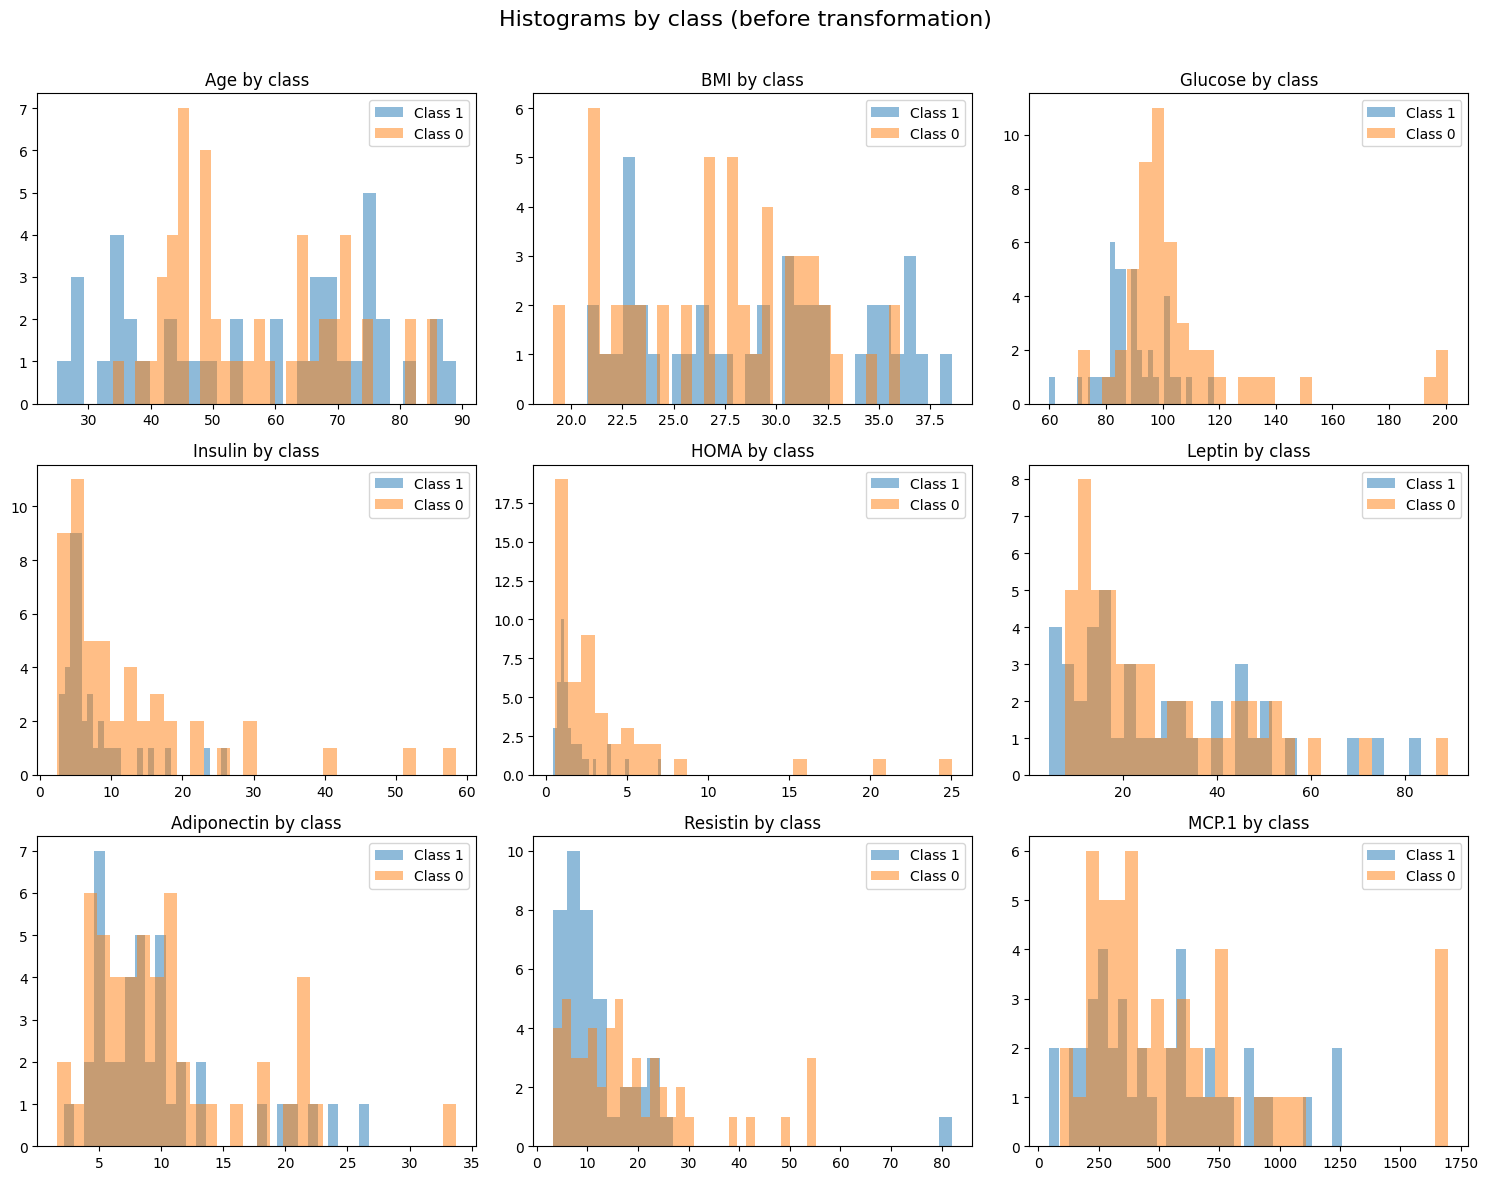

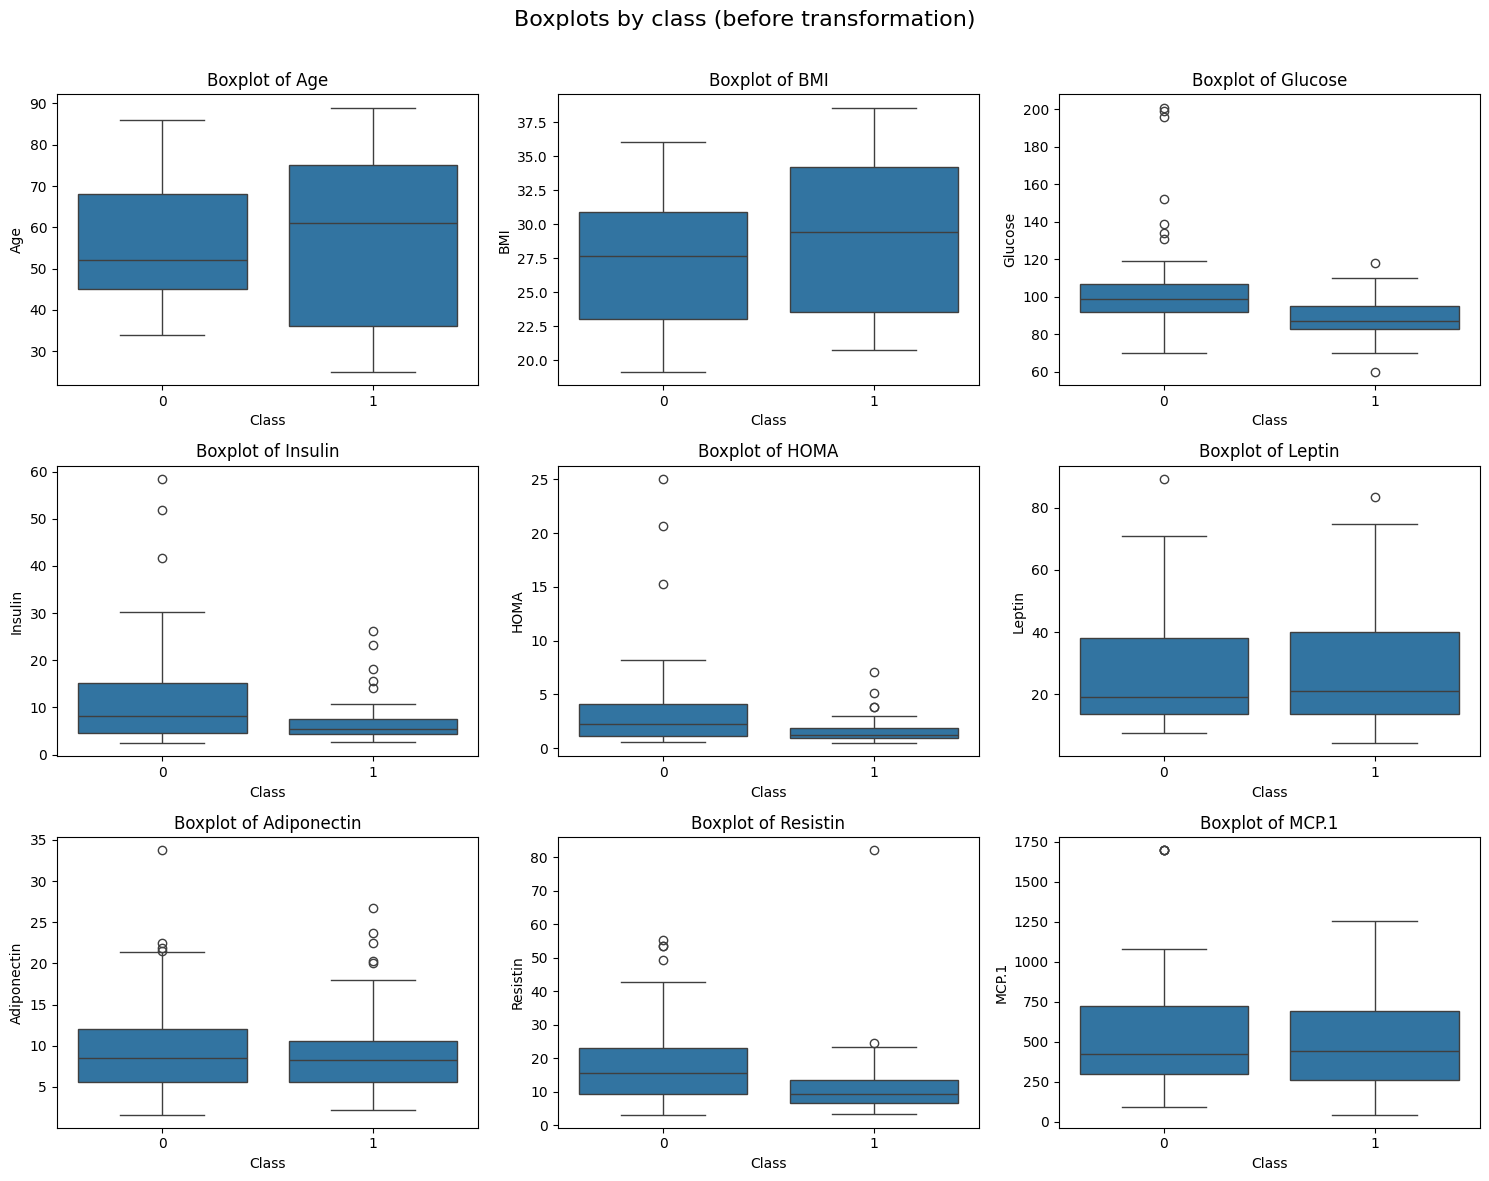

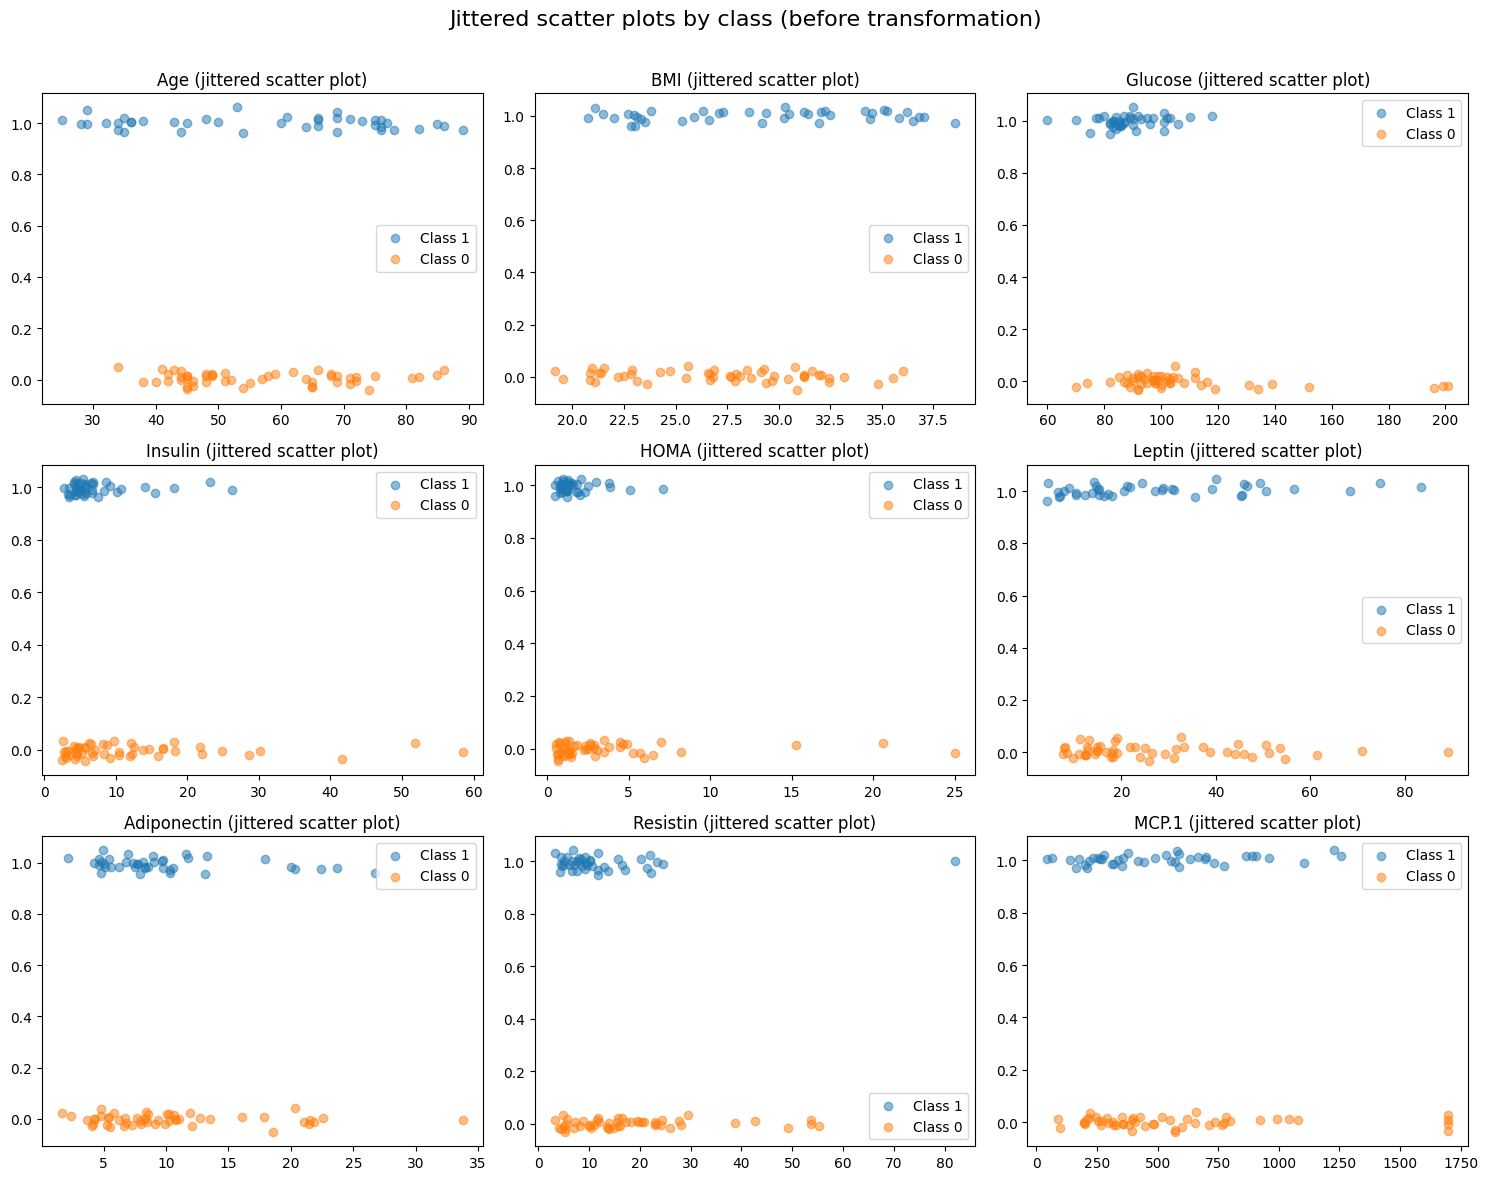

In [68]:
# Temporary merge for visualization
train_data = X_train.copy()
train_data['Classification'] = y_train

variables = X_train.columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))

# Histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in y_train.unique():
        axes[i].hist(X_train[y_train == cls][col], bins=30, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} by class")
    axes[i].legend()
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Scatter plots (jittered)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in y_train.unique():
        axes[i].scatter(
            X_train[y_train == cls][col],
            np.random.normal(loc=cls, scale=0.02, size=X_train[y_train == cls][col].shape),
            alpha=0.5,
            label=f"Class {cls}"
        )
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


To better understand the differences between patients with cancer (Class 1) and healthy patients (Class 0), we represented the distributions of explanatory variables segmented by class. Three complementary types of visualizations were produced: histograms, boxplots, and jittered scatter plots.

### Histograms by class

Histograms allow us to observe the distribution of values within each class. Several variables show notable shifts between the two groups, notably:
- **Age**: patients with cancer tend to be slightly older.
- **Resistin**, **MCP.1**, and **Adiponectin** appear to exhibit density shifts between classes, suggesting potential discriminative power.
- Conversely, variables such as **BMI** or **Leptin** show strong overlap between classes.

These qualitative observations suggest that some variables may be informative, but **none alone allow a clear separation**.

### Boxplots by class

Boxplots provide a more precise visual assessment of distribution differences:
- Most variables display **high dispersion** with numerous **outliers** visible in both classes, particularly for `Insulin`, `Leptin`, and `MCP.1`.
- **Medians are close**, but some trends differ (e.g., `Resistin` is higher for class 1).

These elements indicate **high intra-class variance**, which may affect the performance of models sensitive to unstandardized scales.

### Jittered scatter plots

These visualizations explicitly show vertical separation between classes (0 or 1):
- No single variable fully separates the classes.
- Some clusters appear (e.g., low values of `Insulin`, `HOMA`, `Adiponectin` associated with class 0), but with **significant overlap**.

---

### Summary of exploratory analysis

- Variables seem to contain **partial signals**, but will need to be **combined in a multivariate model** to best exploit interactions.
- The presence of **outliers**, **asymmetric distributions**, and **variables on very different scales** justifies:
  - **prior standardization** of variables,
  - and possibly a **logarithmic transformation** for some (e.g., `Insulin`, `Leptin`, `HOMA`).
- Finally, the strong **inter-class overlap** implies that linear separation may be limited, motivating the use of nonlinear models.

This exploratory step thus rigorously motivates the choices of **preprocessing** and **supervised modeling** to follow.


# Step 4 — Correlation matrix and scatter matrix (training set only)


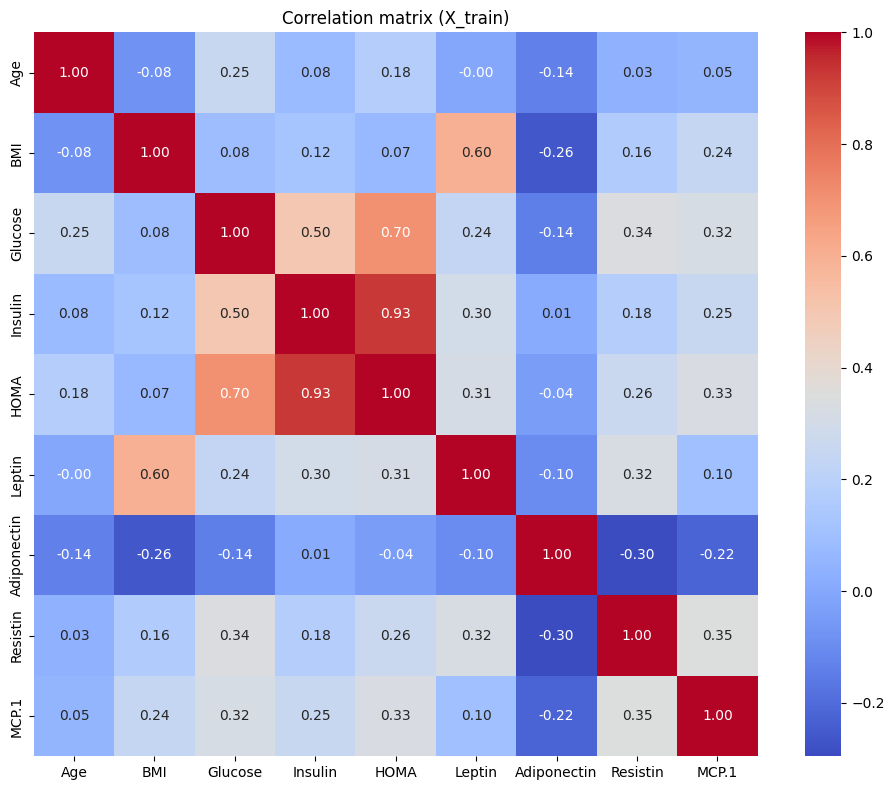

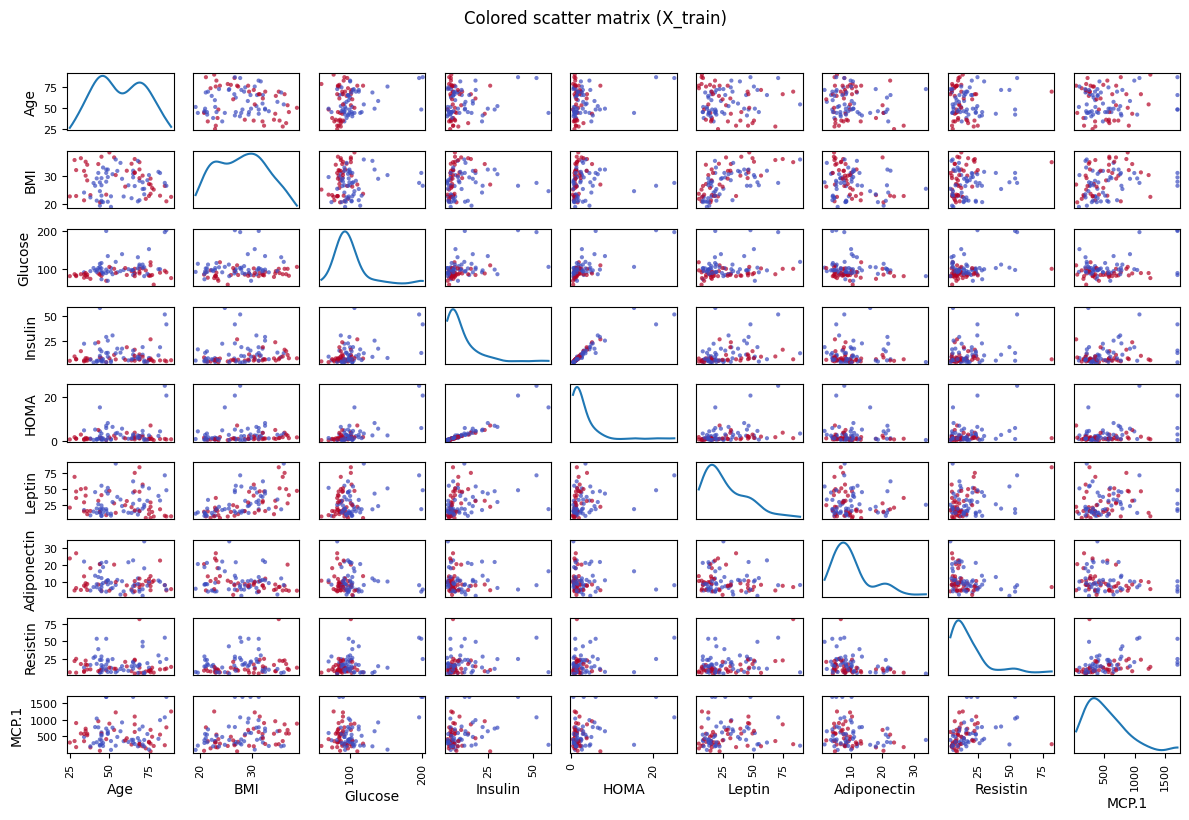

In [69]:
from pandas.plotting import scatter_matrix

# Correlation matrix (on training data)
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix (X_train)")
plt.tight_layout()
plt.show()

# Combined DataFrame for colored visualization
X_train_visu = X_train.copy()
X_train_visu['Classification'] = y_train.values

# Colored scatter matrix
scatter_matrix(X_train_visu.drop(columns='Classification'),
               figsize=(12, 8),
               diagonal='kde',
               c=X_train_visu['Classification'],
               cmap='coolwarm',
               alpha=0.7)
plt.suptitle("Colored scatter matrix (X_train)", y=1.02)
plt.tight_layout()
plt.show()


To examine potential redundancy between variables and anticipate multicollinearity risks, we studied the linear relationships among explanatory variables using two complementary tools:

### Correlation matrix

The correlation matrix identifies linear relationships between continuous variables. Notably, we observe:

- A **very strong correlation** between `Insulin` and `HOMA` (ρ ≈ 0.93), as expected since HOMA is a function of insulin and glucose (`HOMA = (Glucose × Insulin) / 405`).
- Moderate correlations between:
  - `Glucose` and `HOMA` (ρ ≈ 0.70),
  - `BMI` and `Leptin` (ρ ≈ 0.60).
- Other pairs exhibit relatively low correlations (ρ < 0.4), suggesting that **most variables provide complementary information**.

This analysis suggests considering **dimensionality reduction** or **feature selection**, especially if certain methods are sensitive to collinearity (e.g., logistic regression).

### Colored scatter matrix

The scatter matrix, colored by class (`Classification`), provides a global view of pairwise interactions between variables while highlighting groupings by class.

- There is **significant overlap** between the two classes in most 2D projections.
- Some variable combinations, such as (`Resistin`, `MCP.1`) or (`Adiponectin`, `HOMA`), show partial separation between classes but not a clear boundary.

---

### Conclusion of this step

- There is no **obvious linear separation** between the two classes in the variable pairs.
- The dataset structure suggests that multivariate methods could benefit from **complex**, possibly **nonlinear** relationships.
- **Standardization** will be necessary before applying scale-sensitive methods (SVM, k-NN, PCA, etc.).

We now proceed to the preprocessing step (data standardization) before comparing different supervised learning methods.


# Step 5 — Logarithmic transformation


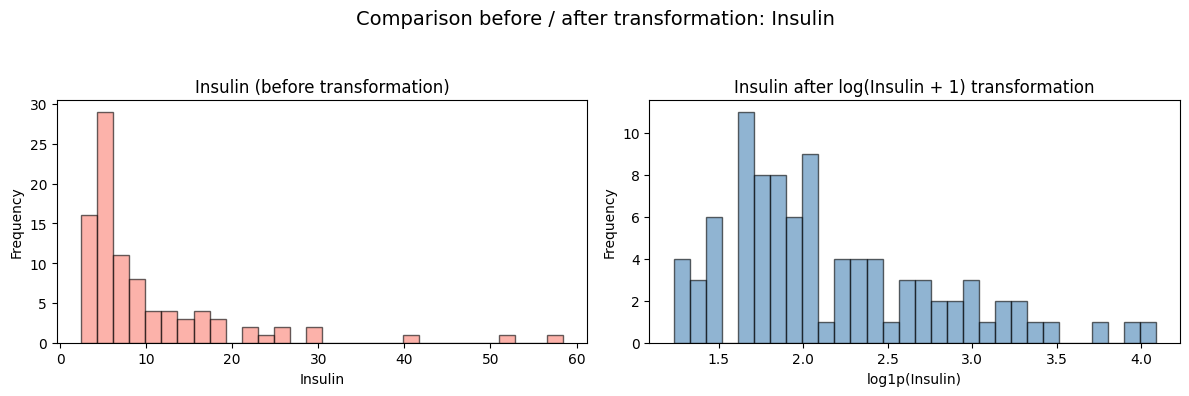

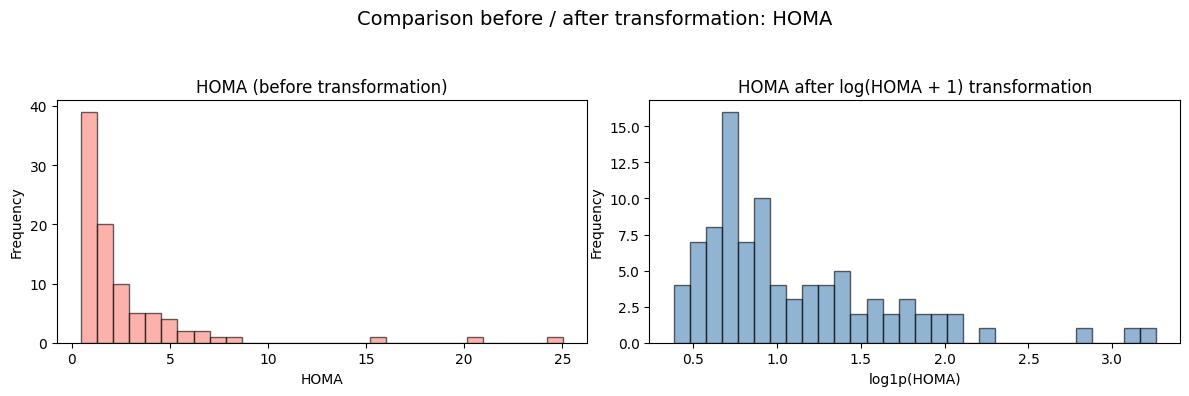

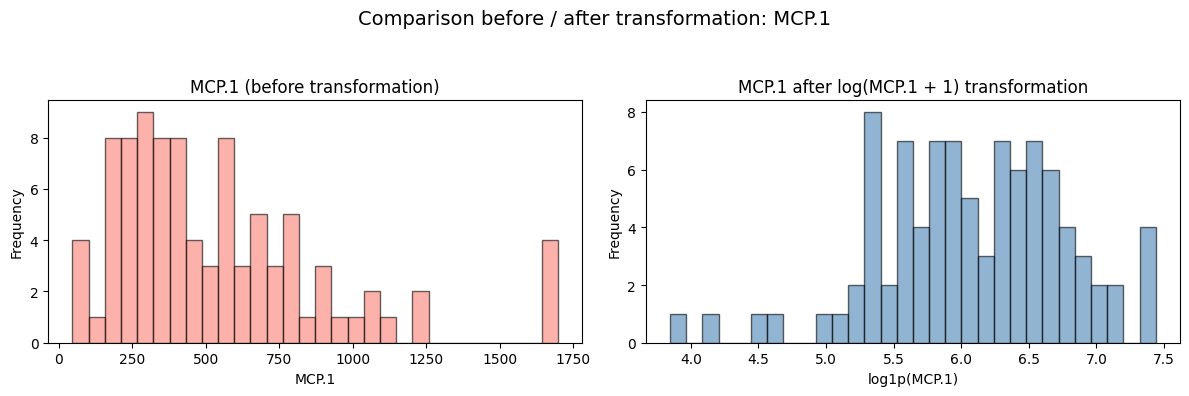

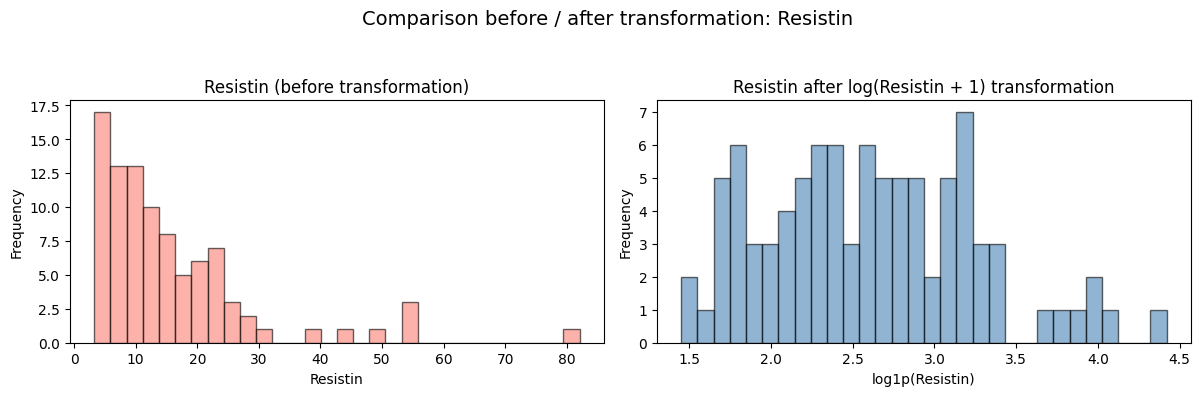

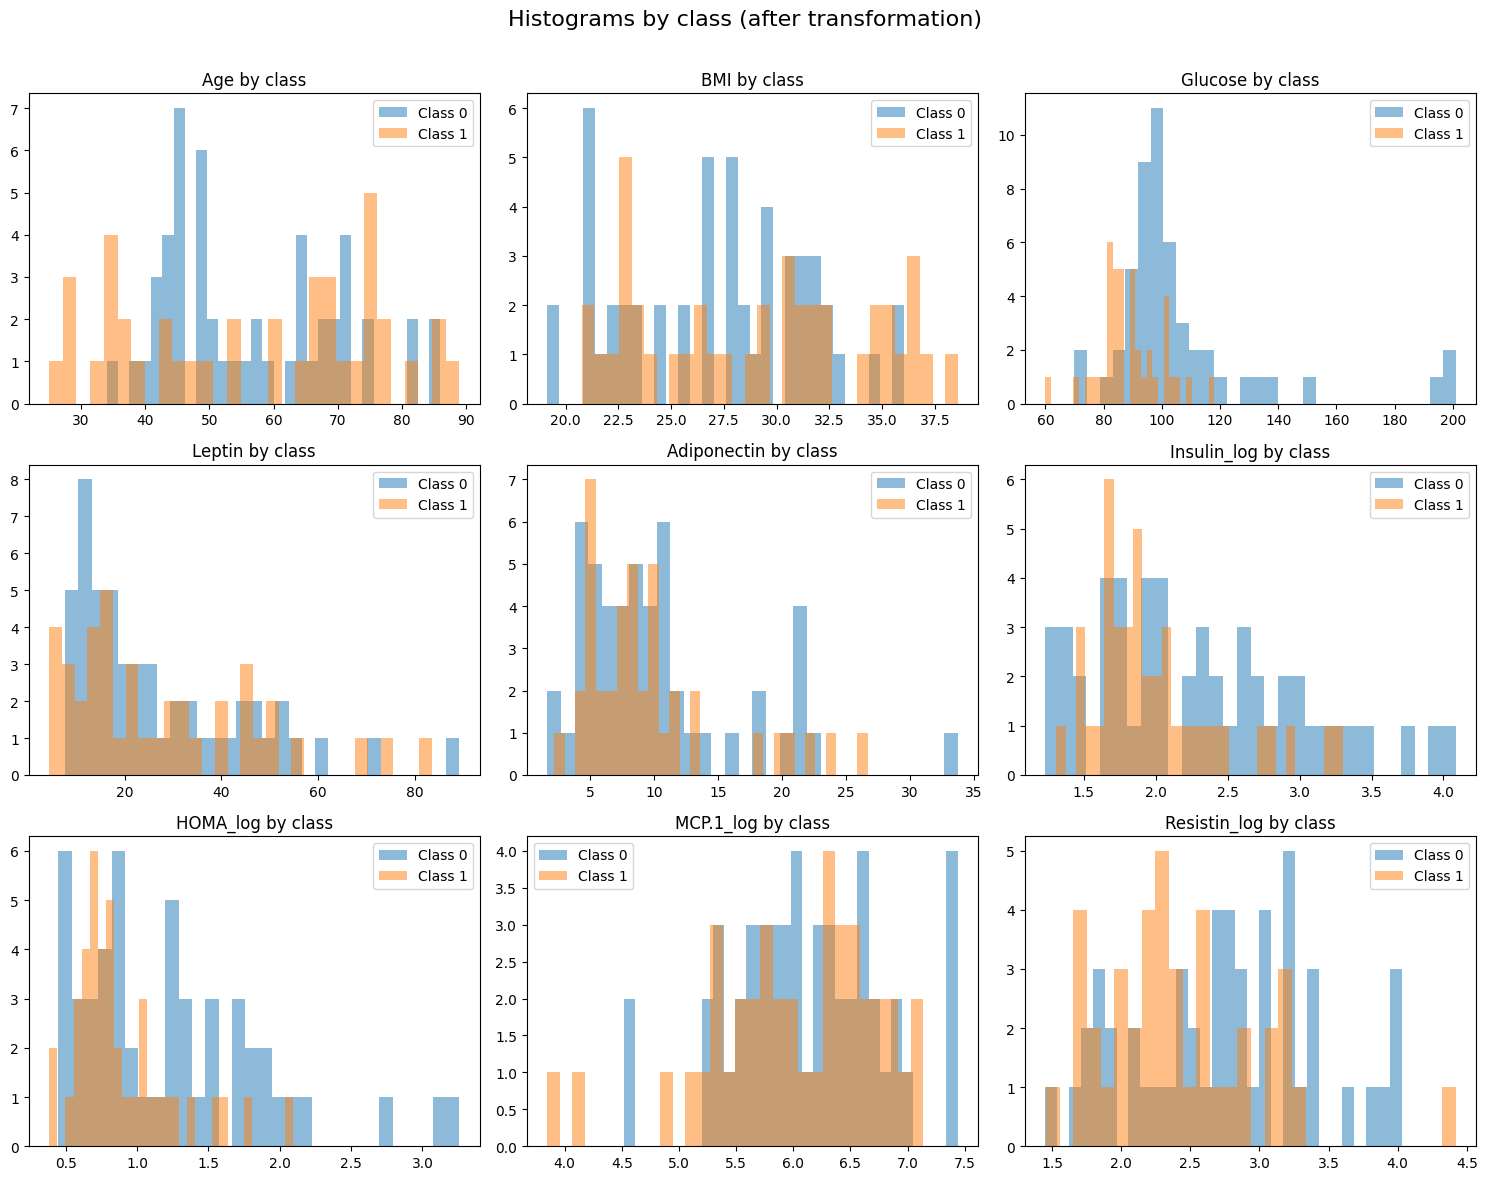

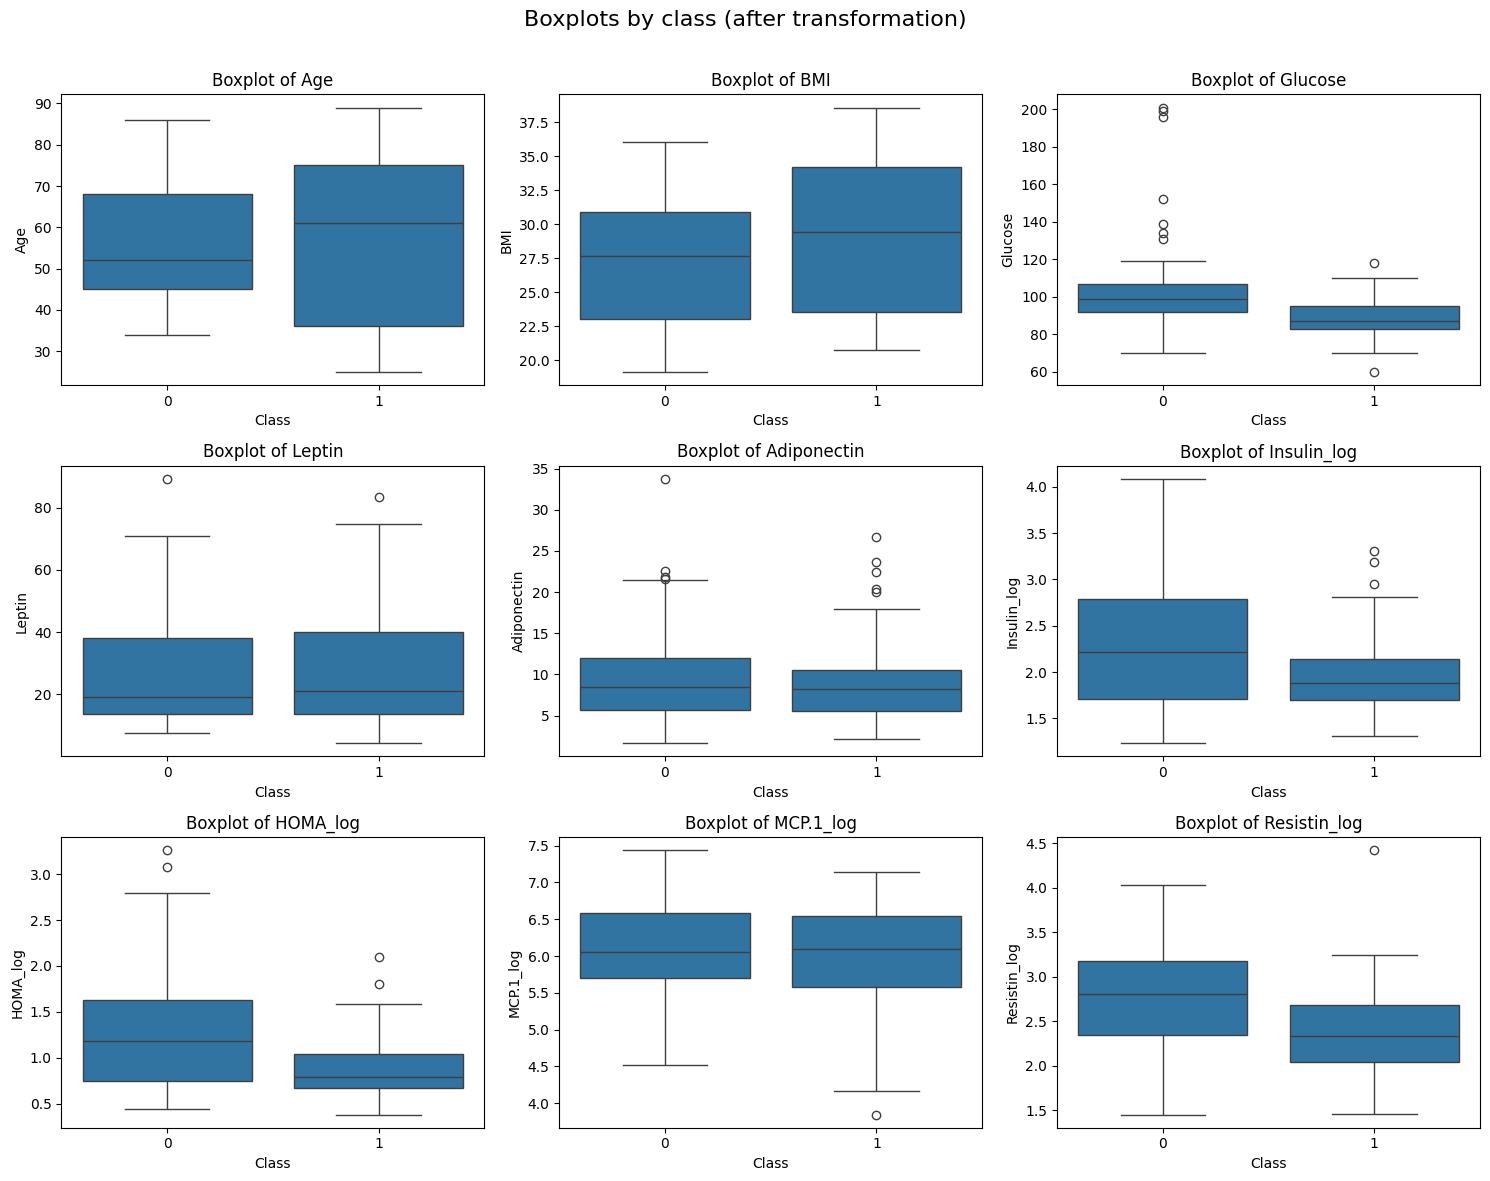

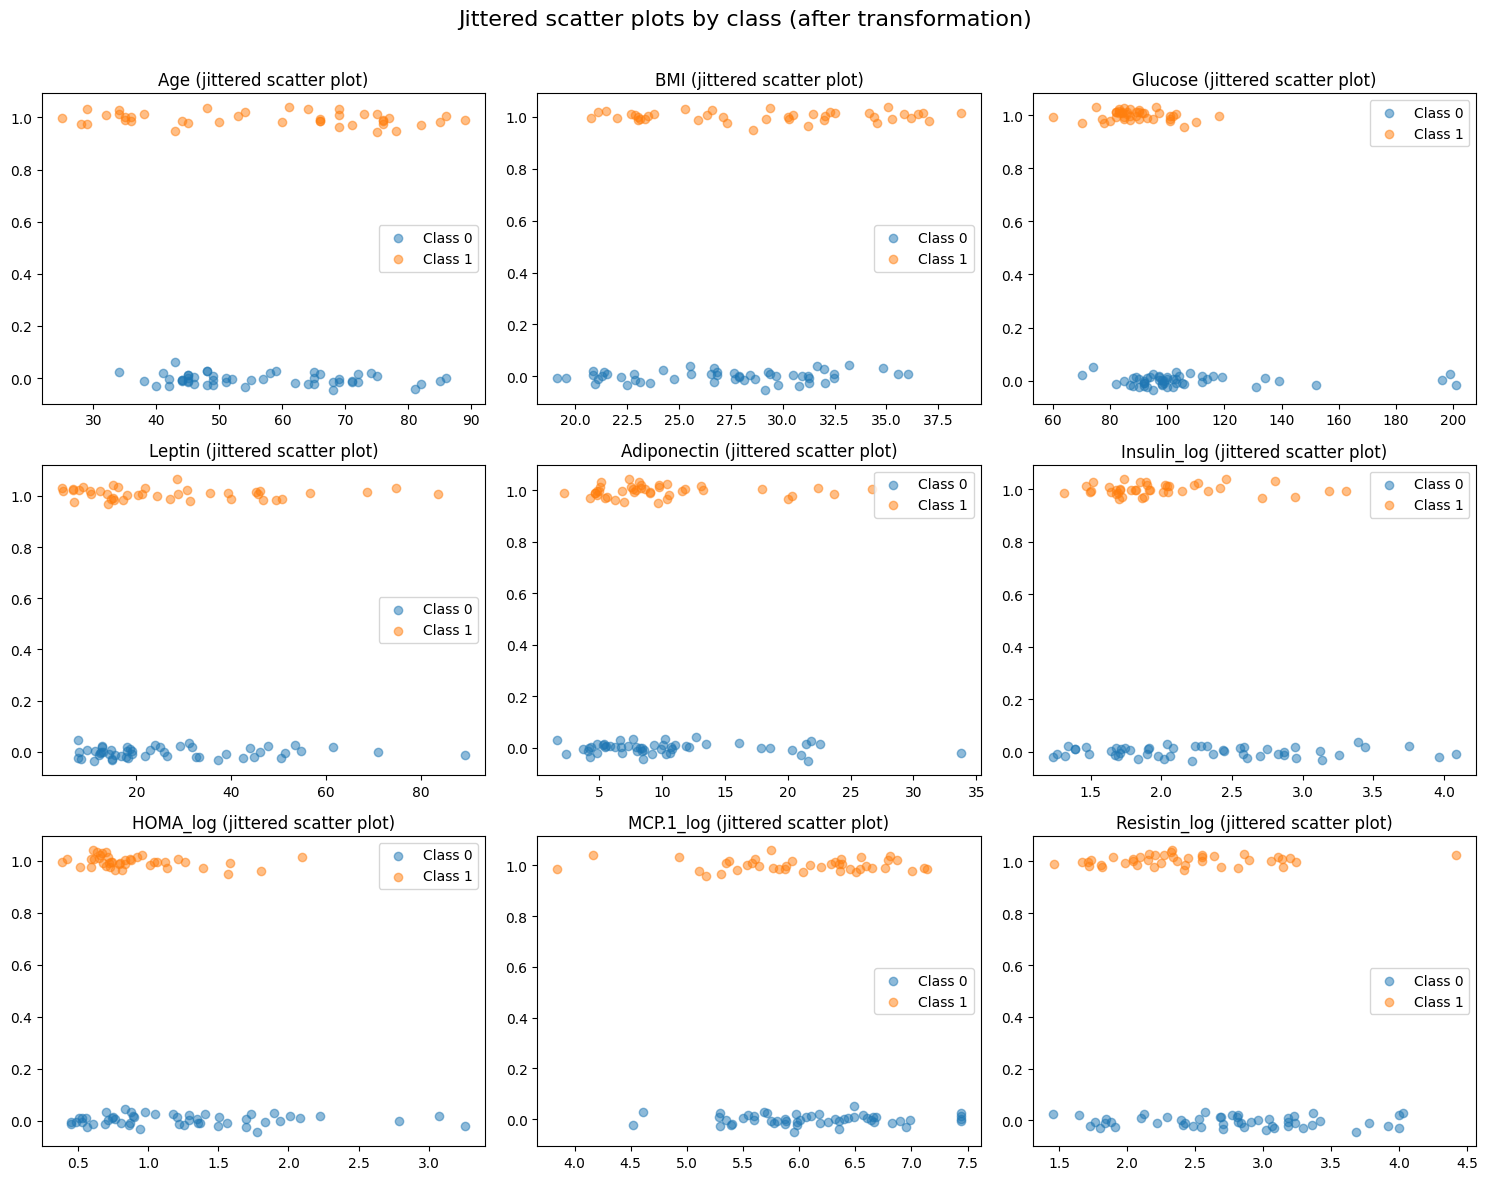

In [70]:
# List of variables to transform (asymmetric distributions)
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Comparison before / after transformation (1 figure per variable)
for col in variables_log:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before transformation
    axes[0].hist(X_train[col], bins=30, alpha=0.6, color='salmon', edgecolor='black')
    axes[0].set_title(f"{col} (before transformation)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # After log1p transformation
    transformed = np.log1p(X_train[col])
    axes[1].hist(transformed, bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[1].set_title(f"{col} after log({col} + 1) transformation")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Comparison before / after transformation: {col}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Apply the transformation to X_train
X_train_transformed = X_train.copy()
for col in variables_log:
    X_train_transformed[col + '_log'] = np.log1p(X_train[col])
X_train_transformed = X_train_transformed.drop(columns=variables_log)

# Update the list of transformed features
features = X_train_transformed.columns.tolist()

# Merge with y_train to facilitate visualization
train_data2 = X_train_transformed.copy()
train_data2['Classification'] = y_train.values

# Histograms by class
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        axes[i].hist(train_data2[train_data2['Classification'] == cls][col],
                     bins=30, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} by class")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Classification', y=col, data=train_data2, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Jittered scatter plots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        values = train_data2[train_data2['Classification'] == cls][col]
        jittered_y = np.random.normal(loc=cls, scale=0.02, size=values.shape)
        axes[i].scatter(values, jittered_y, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Objective

The initial exploratory analysis revealed a **marked skewness** (distribution heavily right-skewed) for several variables: `Insulin`, `HOMA`, `MCP.1`, and `Resistin`.  
These distributions contained many extreme values that could hinder the learning of some models (logistic regression, k-NN, SVM, etc.) sensitive to scale differences or non-normality.

To make these distributions more symmetric and reduce the impact of extreme values, we applied a **logarithmic transformation** of the form `log(x + 1)` using the `np.log1p` function.

---

### Comparison before / after transformation

For each transformed variable, we compared the distribution **before and after transformation** using histograms:

- The long right tails are **strongly reduced**.
- The distributions become **more compact, less skewed**, and often closer to a Gaussian shape.
- This improves data homogeneity and facilitates subsequent **standardization** steps.

These figures provide a **clear visual justification** for the interest in logarithmic transformation.

---

### Dataset update

The new transformed variables (`Insulin_log`, `HOMA_log`, `MCP.1_log`, `Resistin_log`) were added to the dataset, and the original variables were removed to avoid redundancy.

---

### Visualization of transformed variables by class

To observe the effect of this transformation on the distribution of values within the two classes (positive / negative), we reproduced several visualizations on the transformed variables:

#### • Histograms by class  
These histograms allow visualization of relative densities within each class after transformation.  
We observe that some variables, notably `Insulin_log` and `Resistin_log`, still present density differences between classes, but with a **much more regular distribution**.

#### • Boxplots by class  
The log transformation clearly reduces the impact of **visible outliers** in the boxplots.  
Medians are more representative and interquartile ranges less spread.

#### • Jittered scatter plots  
These visualizations show that points remain well separated vertically between classes 0 and 1, while benefiting from a **more controlled horizontal distribution**, which favors distance-based models.

---

### Conclusion

Applying the logarithmic transformation allowed to:
- Reduce the effect of extreme values,
- Stabilize variance,
- Improve the geometric structure of the dataset in view of standardization and learning.

These transformations constitute an **essential step in the preprocessing pipeline** before model construction.


# Step 6 — Standardization (StandardScaler)


In [71]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the transformed training set and transform
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_transformed),
    columns=X_train_transformed.columns,
    index=X_train_transformed.index
)

# Display summary statistics of scaled data
X_train_scaled.describe().T[['mean', 'std']]


,mean,std
Age,1.037817e-16,1.005479
BMI,-8.447349e-17,1.005479
Glucose,1.995309e-16,1.005479
Leptin,6.033821e-17,1.005479
Adiponectin,1.436049e-16,1.005479
Insulin_log,2.292852e-16,1.005479
HOMA_log,-3.891814e-16,1.005479
MCP.1_log,-7.406515e-16,1.005479
Resistin_log,-1.680419e-16,1.005479


### Objective

After applying logarithmic transformation to asymmetric variables, we apply **standardization** to all explanatory variables in the training set.  
This step aims to **bring all variables to the same scale** by centering them around zero and scaling them to unit variance.

Standardization is particularly important for models sensitive to distances or scale differences, such as:
- logistic regression (for more stable convergence),
- support vector machines (SVM),
- k-nearest neighbors (k-NN),
- regularization methods (Ridge, Lasso),
- and dimensionality reduction techniques (PCA, etc.).

---
### Method

The transformation used is the classical Z-score standardization, defined as:

$$
X^{(i)}_{\text{std}} = \frac{X^{(i)} - \mu^{(i)}}{\sigma^{(i)}}
$$

where \( \mu^{(i)} \) and \( \sigma^{(i)} \) denote respectively the mean and standard deviation of variable \( X^{(i)} \) computed on the training set.

We use the `StandardScaler` tool from `scikit-learn`, applied only on the training data (`fit_transform`) to avoid any data leakage.


# Step 7 — Preparation of X_test


In [72]:
# Copy X_test
X_test_transformed = X_test.copy()

# Apply the same log-transformations
for col in variables_log:
    X_test_transformed[col + '_log'] = np.log1p(X_test_transformed[col])

# Drop original columns
X_test_transformed = X_test_transformed.drop(columns=variables_log)

# Standardize using the scaler previously fitted on X_train
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_transformed),
    columns=X_test_transformed.columns,
    index=X_test_transformed.index
)

# Check that the columns of X_test are identical (and in the same order) as those of X_train to avoid prediction errors
if list(X_train_scaled.columns) != list(X_test_scaled.columns):
    print("Mismatch between train and test columns")


The transformations previously applied to the training set (logarithmic transformation + standardization) must be **reproduced exactly the same way** on the test set, without re-estimating any parameters.

### Steps performed:
1. **Logarithmic transformation** on the same variables (`Insulin`, `HOMA`, `MCP.1`, `Resistin`) using `log(x + 1)`;
2. **Removal of raw variables** to avoid redundancy;
3. **Standardization using the same parameters** (mean `μ`, standard deviation `σ`) learned from `X_train`, via `scaler.transform()`.

We also verified that the **columns of `X_test_scaled` are exactly the same (and in the same order)** as those of `X_train_scaled`, ensuring compatibility with the learning models.

---

This step completes the preprocessing pipeline and allows us to proceed to **supervised modeling**.


# Step 8 — Modeling with LogisticRegression


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize and train the model without explicit regularization
logreg_simple = LogisticRegression(random_state=42)
logreg_simple.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_simple = logreg_simple.predict(X_test_scaled)

# Basic performance evaluation
print("Evaluation of simple model (logistic regression)")
print("Accuracy:", round(accuracy_score(y_test, y_pred_simple), 3))
print("F1-score:", round(f1_score(y_test, y_pred_simple), 3))
print("\nClassification report:\n", classification_report(y_test, y_pred_simple))


Evaluation of simple model (logistic regression)
Accuracy: 0.792
F1-score: 0.783

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.75      0.82      0.78        11

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.80      0.79      0.79        24



We begin by training a simple logistic regression model, without explicit regularization, on the preprocessed data (after log transformation and standardization).

### Objective

Predict the probability that a patient has cancer based on the nine explanatory variables.  
Logistic regression is an interpretable linear model, particularly suited for a first supervised approach.

### Results on the test set

The model was evaluated on the test set after training on the standardized data. The results are as follows:

- **Accuracy**: 0.792
- **F1-score**: 0.783

### Classification report details:

| Class   | Precision | Recall | F1-score | Support |
|---------|-----------|--------|----------|---------|
| 0 (healthy) | 0.83      | 0.77   | 0.80     | 13      |
| 1 (cancer)  | 0.75      | 0.82   | 0.78     | 11      |

- **Macro avg F1**: 0.79  
- **Weighted avg F1**: 0.79

These results show a good balance between precision and recall, which is important in a medical context.  
However, this simple model does not account for potential interactions between variables nor hyperparameter optimization, which will be addressed in the following steps.

---


# Step 9 — Cross-validation on training data


10-fold cross-validation
Mean F1-score : 0.696 ± 0.187
Mean Accuracy : 0.731 ± 0.175


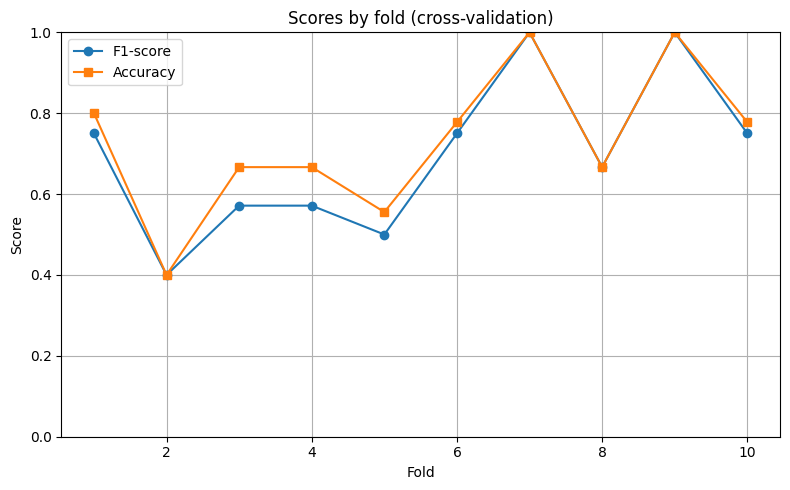

In [74]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation on the simple model
f1_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='f1')
acc_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Summary
print("10-fold cross-validation")
print(f"Mean F1-score : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Mean Accuracy : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")

# Visualization of scores by fold
folds = range(1, len(f1_scores) + 1)
plt.figure(figsize=(8, 5))
plt.plot(folds, f1_scores, marker='o', label='F1-score')
plt.plot(folds, acc_scores, marker='s', label='Accuracy')
plt.title("Scores by fold (cross-validation)")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


To evaluate the stability of the logistic regression model and its generalization capacity, we performed a **10-fold cross-validation** (k-fold CV).  
Two main metrics were monitored: the **F1-score** (suitable for imbalanced class contexts) and **accuracy** (overall correctness).

### Cross-validation results

- **Mean F1-score**: 0.696 ± 0.187  
- **Mean Accuracy**: 0.731 ± 0.175

### Analysis

The high variance in scores (standard deviations > 0.17) reflects a **sensitivity to fold composition**, likely due to the **small training set size** (92 observations).  
This justifies the need for future **regularization or feature selection**.

### Visualization

The figure below shows individual scores obtained on each fold. There is **significant variability between folds**, especially in F1-scores (some folds dropping to 0.4–0.5, others exceeding 0.8), confirming the need to optimize the model for better robustness.

---

This step establishes a baseline for the simple model’s performance before considering **hyperparameter optimization**.


# Step 10 — Hyperparameter Optimization (GridSearchCV)


In [75]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 4, 10),  # from 0.01 to 10000 (log scale)
    'solver': ['liblinear']  # required for 'l1' penalty
}

# Initialize the model + cross-validation grid search
logreg_grid = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(logreg_grid, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best model
best_logreg = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best F1-score (cross-val):", round(grid_search.best_score_, 3))


Best parameters: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score (cross-val): 0.737


To improve the model’s performance, we implemented a **grid search (GridSearchCV)** to identify the best combination of hyperparameters for logistic regression.  
The goal is to automatically select the optimal level of regularization to balance the model’s learning capacity and generalization.

---

### Hyperparameter grid tested

The following combinations were evaluated using 10-fold cross-validation:

- **Regularization type (`penalty`)**:  
  `'l1'` (Lasso, encouraging sparsity) and `'l2'` (Ridge, classical quadratic regularization),
- **Regularization coefficient (`C`)**:  
  `[0.01, 0.1, 1, 10, 100]`  
  *(the larger `C`, the weaker the regularization; `C` is the inverse of the regularization strength)*,
- **Solver (`solver`)**:  
  `'liblinear'`, chosen because it is the only solver compatible with `l1` regularization in `scikit-learn`.

The evaluation metric used to guide selection was the **F1-score**, well suited to binary classification problems with class imbalance.

---

### Search results

- **Best hyperparameters identified**:  
  `{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}`

- **Mean F1-score in cross-validation (10 folds)**:  
  **0.737**

---

### Analysis and interpretation

The optimal model uses:
- a **weak L1 regularization** (`C = 100`), which reduces the penalization effect while allowing automatic zeroing of some coefficients (sparsity),
- a **more parsimonious formulation**, potentially limiting overfitting on a small dataset,
- an **interpretable structure**, since non-zero coefficients can be directly analyzed as variable weights.

The fact that the best value of `C` lies at the upper edge of the initial grid motivated extending the search range, but this confirmed that `C = 100` remains optimal.  
This suggests that regularization, though controlled, **does not have a significant impact** on performance in this context.

---

### Expected impact

The regularized model thus obtained will be evaluated in the next step (step 11) on the test set.  
The goal is to check whether this optimization provides **a significant performance gain** compared to the baseline (non-regularized) model of step 8.


# Step 11 — Evaluation of the optimized model



Evaluation on test set:
Accuracy: 0.792
F1-score: 0.762

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.80      0.73      0.76        11

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24



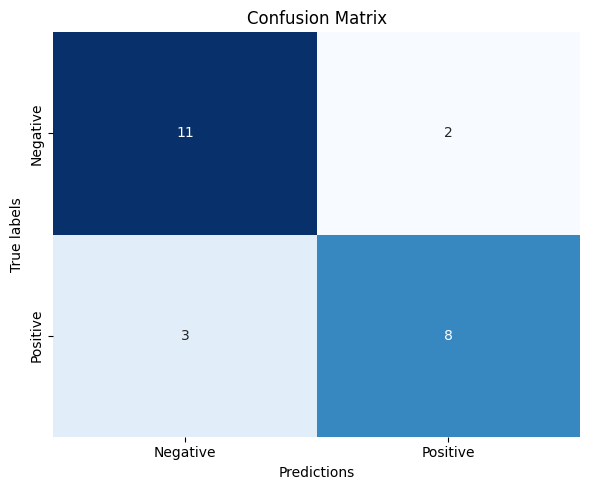

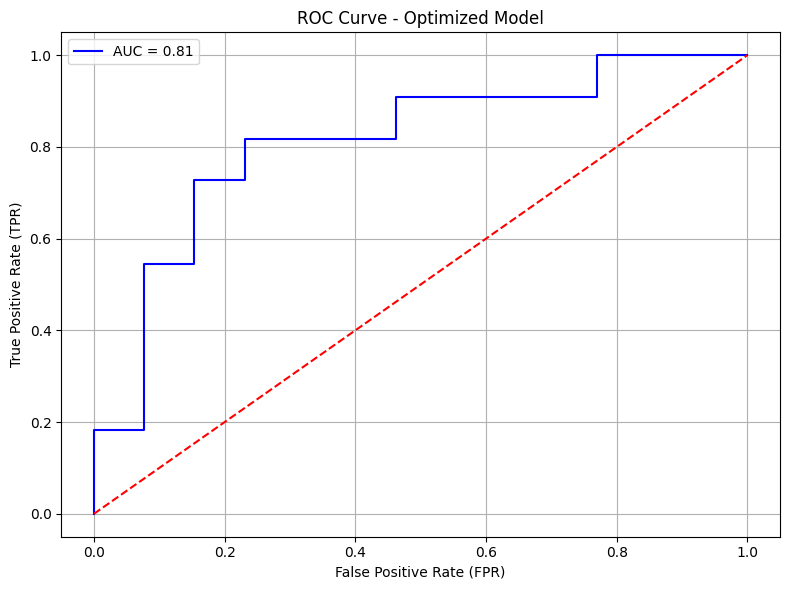

In [76]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predictions
y_pred_best = best_logreg.predict(X_test_scaled)

# Overall evaluation
print("\nEvaluation on test set:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("F1-score:", round(f1_score(y_test, y_pred_best), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.tight_layout()
plt.show()

# ROC curve and AUC
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve - Optimized Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


---

After selecting the best logistic regression model by cross-validation (see Step 10), we evaluated it on the **test set**, which remained completely independent during training.

---

### Overall Results

- **Accuracy**: 0.792  
- **F1-score**: 0.762

**Classification Report:**

| Class        | Precision | Recall | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| 0 (healthy)  | 0.79      | 0.85   | 0.81     | 13      |
| 1 (diseased) | 0.80      | 0.73   | 0.76     | 11      |
| **Macro avg**| 0.79      | 0.79   | 0.79     | 24      |

The **balance between precision and recall is good**, and overall performance is comparable (slightly lower in F1-score) to that obtained with the simple model (Step 8), despite the imposed L1 regularization.

---

### Confusion Matrix

The matrix below shows class-wise prediction performance:

|           | Predicted: 0 | Predicted: 1 |
|-----------|--------------|--------------|
| **True: 0** | 11           | 2            |
| **True: 1** | 3            | 8            |

- **11 true negatives** and **8 true positives** correctly identified  
- **2 false positives** and **3 false negatives**

The model shows a **good ability to identify both classes**, although some diseased cases are still missed (which is critical in a medical context).

---

### ROC Curve and AUC

The ROC curve on the test set confirms a **good discriminative ability**, with an **area under the curve (AUC) of 0.81**.

This means that on average, the model assigns a higher probability to a diseased individual than to a healthy individual in **81% of cases**.

The ROC curve lies well above the diagonal (random classifier), validating the quality of the model.

---

### Conclusion

The optimized model offers a **robust trade-off between performance and sparsity**, featuring:
- L1 regularization that limits overfitting,
- stability demonstrated through cross-validation,
- solid test set performance.

This evaluation confirms that logistic regression is a **reliable and interpretable model** on this dataset, although nonlinear models could be explored to further improve results.

---


# Step 12 — Comparison of Logistic Regression Variants


                          Model  Accuracy  F1-score    AUC
0                 Simple LogReg     0.792     0.783  0.811
1  Optimized LogReg (L1, C=100)     0.792     0.762  0.811


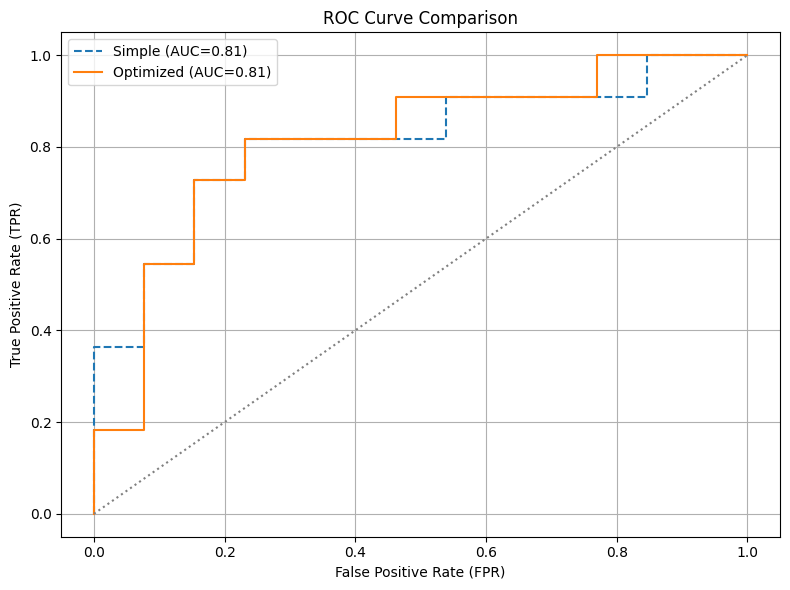

<Figure size 1000x600 with 0 Axes>

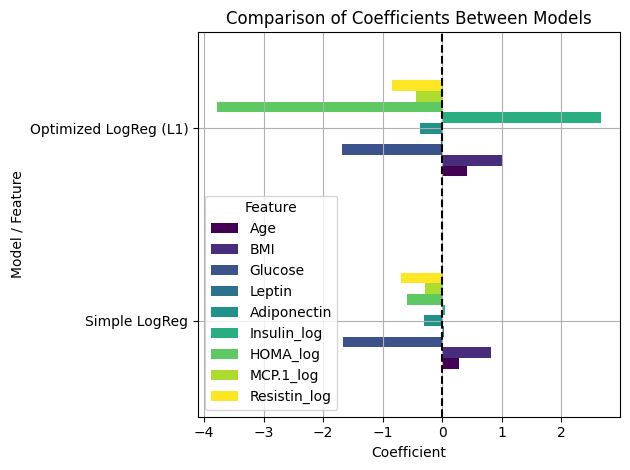

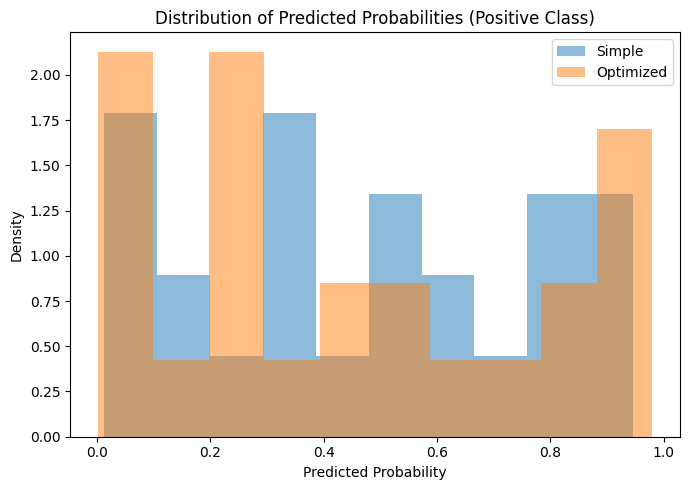

,y_test,Pred_simple,Pred_optimized
66,0,1,1
5,1,0,0
80,0,1,0
16,1,1,0
103,0,1,1
13,1,0,0


In [77]:
from sklearn.metrics import roc_auc_score

# 1. Compute predicted probabilities
y_proba_simple = logreg_simple.predict_proba(X_test_scaled)[:, 1]
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]

# 2. Summary of scores
results = pd.DataFrame({
    'Model': ['Simple LogReg', 'Optimized LogReg (L1, C=100)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_simple),
        accuracy_score(y_test, y_pred_best)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_simple),
        f1_score(y_test, y_pred_best)
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_simple),
        roc_auc_score(y_test, y_proba_best)
    ]
})
print(results.round(3))

# 3. Overlaid ROC curves
fpr_simple, tpr_simple, _ = roc_curve(y_test, y_proba_simple)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_simple, tpr_simple, '--', label=f'Simple (AUC={roc_auc_score(y_test, y_proba_simple):.2f})')
plt.plot(fpr_best, tpr_best, '-', label=f'Optimized (AUC={roc_auc_score(y_test, y_proba_best):.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='grey')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Comparison of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Simple LogReg': logreg_simple.coef_[0],
    'Optimized LogReg (L1)': best_logreg.coef_[0]
}).set_index('Feature')

plt.figure(figsize=(10, 6))
coef_df.T.plot(kind='barh', colormap='viridis')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Comparison of Coefficients Between Models")
plt.xlabel("Coefficient")
plt.ylabel("Model / Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Distribution of predicted probabilities (class 1)
plt.figure(figsize=(7, 5))
plt.hist(y_proba_simple, bins=10, alpha=0.5, label="Simple", density=True)
plt.hist(y_proba_best, bins=10, alpha=0.5, label="Optimized", density=True)
plt.title("Distribution of Predicted Probabilities (Positive Class)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# 6. Analysis of errors per individual
errors = pd.DataFrame({
    'y_test': y_test.values,
    'Pred_simple': y_pred_simple,
    'Pred_optimized': y_pred_best
}, index=y_test.index)

# Display only cases misclassified by at least one model
diff = errors.query("Pred_simple != y_test or Pred_optimized != y_test")
display(diff)


We compared two versions of the logistic regression model:
- a **simple model**, without explicit regularization (default parameters),
- an **optimized model**, with L1 regularization (`penalty='l1'`, `C=100`), determined via cross-validation.

---

### Overall Performance

| Model                        | Accuracy | F1-score | AUC   |
|-----------------------------|----------|----------|-------|
| Simple LogReg                | 0.792    | 0.783    | 0.811 |
| Optimized LogReg (L1, C=100) | 0.792    | 0.762    | 0.811 |

Both models achieve **identical accuracy (0.792)** and **equivalent discriminative power (AUC = 0.811)**.  
The **simple model attains a slightly higher F1-score**, indicating a better balance between recall and precision on the positive class.

---

### ROC Curves

The ROC curves confirm that the two models are very close in terms of overall performance.  
They share the same AUC (0.81) and follow similar trajectories on the test set.

---

### Coefficients Comparison

The graph below compares the weights assigned to each feature by the two models.

- The L1-regularized model **strongly modifies some coefficients**, especially those of `Insulin_log` and `HOMA_log`, indicating effective regularization.
- Other features like `Glucose` or `BMI` retain a dominant role in both models.

This comparison reinforces the idea that the **regularized model is more parsimonious**, while preserving the essential predictive signal.

---

### Distribution of `predict_proba` Probabilities

We visualized the distributions of predicted probabilities for the positive class from both models.

- Both distributions cover similar ranges, but the regularized model produces **slightly more extreme predictions** (closer to 0 or 1),
- This may indicate **greater confidence in some decisions**, or **better class separation**.

---

### Errors Comparison

We identified the cases where predictions differ between the two models.  
Only a few individuals are classified differently, which explains the very close scores.  
Example:

| id | True Label | Simple | Optimized |
|----|------------|--------|-----------|
| 80 | 0          | 1      | 0         |
| 5  | 1          | 0      | 0         |

This confirms that the **error patterns differ structurally**, even though aggregated performances are close.

---

### Final Analysis

The two models are close in terms of performance but show:
- **structural differences in coefficients**,
- **slight behavioral differences** on borderline individuals,
- and a **smoother decision boundary** in the case of the L1 model.

---

### Conclusion

| Model                      | Main Advantage                        |
|----------------------------|-------------------------------------|
| **Simple LogReg**          | Slightly better F1-score             |
| **Optimized LogReg (L1)**  | Parsimony, regularized coefficients, better interpretability |

In practice, both models can be considered depending on the desired trade-off between raw performance and structural simplicity.  
The L1 model is especially relevant for generalization or automatic feature selection purposes.


# Step 13 (Bonus): Applying PCA to Try to Improve the Models


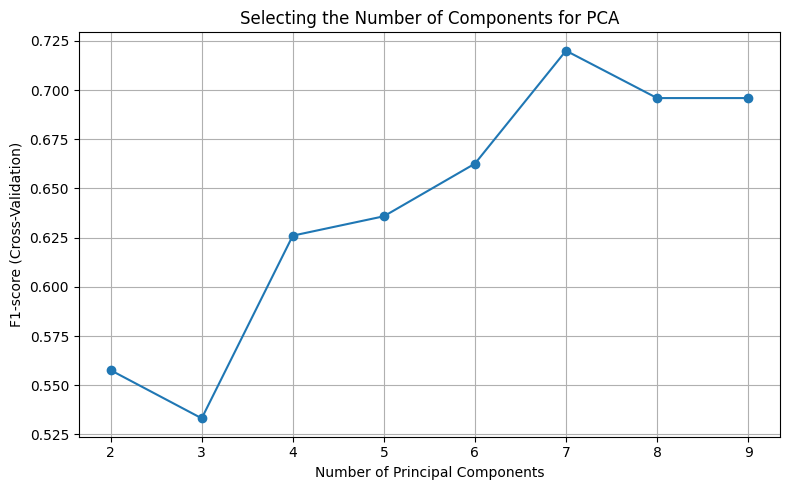

Best hyperparameters: {'C': 1.6681005372000592, 'penalty': 'l2', 'solver': 'liblinear'}
Mean F1-score (cross-validation): 0.715

Test set evaluation:
Accuracy: 0.833
F1-score: 0.818
AUC: 0.832

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.82      0.82      0.82        11

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



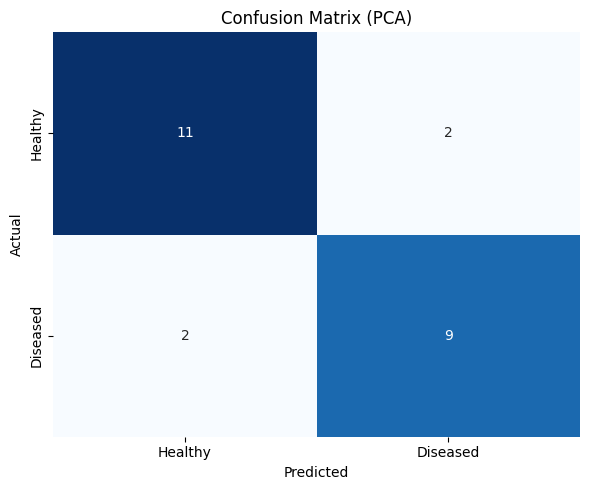

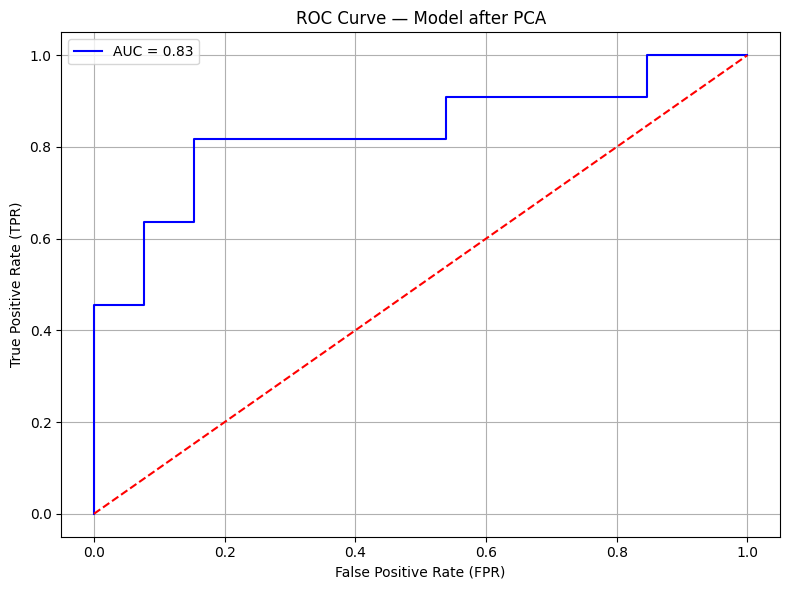

In [78]:
from sklearn.decomposition import PCA

# Step 1 — Select the best number of components via cross-validation
scores = []
components_range = range(2, X_train_scaled.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n, svd_solver='full', random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    model = LogisticRegression(random_state=42, max_iter=1000)
    score = cross_val_score(model, X_train_pca, y_train, cv=10, scoring='f1').mean()
    scores.append(score)

# Plot performance
plt.figure(figsize=(8, 5))
plt.plot(components_range, scores, marker='o')
plt.title("Selecting the Number of Components for PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("F1-score (Cross-Validation)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2 — Apply PCA with the best number of components
n_best = components_range[np.argmax(scores)]
pca_final = PCA(n_components=n_best, svd_solver='full', random_state=42)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

# Step 3 — Model optimization via GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 3, 10),
    'solver': ['liblinear']  # required for L1 penalty
}
logreg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
print("Mean F1-score (cross-validation):", round(grid_search.best_score_, 3))

# Step 4 — Final evaluation on the test set
y_pred_pca = best_model.predict(X_test_pca)
y_proba_pca = best_model.predict_proba(X_test_pca)[:, 1]

print("\nTest set evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_pca), 3))
print("F1-score:", round(f1_score(y_test, y_pred_pca), 3))
print("AUC:", round(roc_auc_score(y_test, y_proba_pca), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (PCA)")
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_pca)
auc_value = roc_auc_score(y_test, y_proba_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve — Model after PCA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Objective

The goal of this step is to investigate whether dimensionality reduction using Principal Component Analysis (PCA) can improve the classification model’s performance.

---

### Justification

Even after logarithmic transformation and standardization, explanatory variables may still contain redundant correlations or uninformative noise. PCA helps to:
- Project the data into a lower-dimensional space,
- Concentrate the majority of variance into a few principal components,
- Stabilize learning on small datasets by reducing unnecessary variance.

---

### Methodology

1. PCA is applied on the standardized data (`X_train_scaled`) using `sklearn.decomposition.PCA`.
2. Classification performance is evaluated as a function of the number of principal components, ranging from 2 to 9 (limited by the original number of variables).
3. For each iteration, a logistic regression model is trained with 10-fold cross-validation to measure the average F1-score.
4. The optimal number of components is selected by maximizing this score.
5. The optimal model is then retrained on the reduced dataset and evaluated on the test set.

---

### Selection of Number of Components

The figure below shows the evolution of the average F1-score according to the number of principal components:

> *Figure – Selection of number of components (PCA)*

The maximum is reached at 7 components, with a cross-validation F1-score of 0.715. Beyond this, the score plateaus, indicating that the last components carry little useful discriminative information.

---

### Final Results on the Test Set

After reducing to 7 components and optimizing logistic regression hyperparameters (`C`, `penalty`) via `GridSearchCV`, the results are:

- Accuracy: 0.833
- F1-score: 0.818
- AUC: 0.832

#### Classification Report:

| Class         | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| 0 (Healthy)   | 0.85      | 0.85   | 0.85     | 13      |
| 1 (Diseased)  | 0.82      | 0.82   | 0.82     | 11      |
| Macro avg     | 0.83      | 0.83   | 0.83     | 24      |

---

### Confusion Matrix

|               | Predicted Healthy | Predicted Diseased |
|---------------|-------------------|--------------------|
| Actual Healthy| 11                | 2                  |
| Actual Diseased| 2                 | 9                  |

The PCA model balances the two classes well, with a reduced number of false positives and false negatives.

---

### ROC Curve

The ROC curve confirms high discriminative power with an AUC of 0.83. This means the model correctly assigns a higher probability to a positive observation than to a negative one in 83% of cases.

---

### Conclusion

Applying classical PCA with 7 principal components:
- Slightly improves overall performance compared to models without dimensionality reduction,
- Stabilizes learning on a small dataset,
- Maintains good discriminative capacity while simplifying data representation.

These results validate the use of linear PCA for dimensionality reduction and justify its integration into the final supervised learning pipeline.
